# Fully Dynamic k-center Clustering

## Parsing

This section has to be runned only once; its role is to parse the data and create a .hdf5 dataset with three fields: one for the timestamp, one for the latitude, one for the longitude. We will use this file in the following sections.

In [1]:
import h5py
def parse_input(path):
    dataset = h5py.File("dataset.hdf5", "w")
    timestamps = dataset.create_dataset("timestamps", (1000000,), dtype='i')
    latitudes = dataset.create_dataset("latitudes", (1000000,), dtype='f')
    longitudes = dataset.create_dataset("longitudes", (1000000,), dtype='f')
    f = open(path,'r')
    for i, line in enumerate(f):
        line = line.split()
        timestamps[i] = int(line[0])
        latitudes[i] = float(line[1])
        longitudes[i] = float(line[2])
    dataset.close()

In [2]:
parse_input('dataset/twitter_1000000.txt')

## Data visualization

Just to check that our geographical data look relevant, i.e that it "coincides" with a world map (at least on the part of the world that are conneted to Twitter!)

In [5]:
import h5py
f = h5py.File('dataset.hdf5', 'r')

In [6]:
timestamps = f['timestamps']
latitudes = f['latitudes']
longitudes = f['longitudes']

In [40]:
dataset = list(zip(latitudes, longitudes))

(0.37526667, 52.263897) 1000001


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
sample_dataset = random.sample(dataset, 4000)
sample_latitudes = [sample[0] for sample in sample_dataset]
sample_longitudes = [sample[1] for sample in sample_dataset]

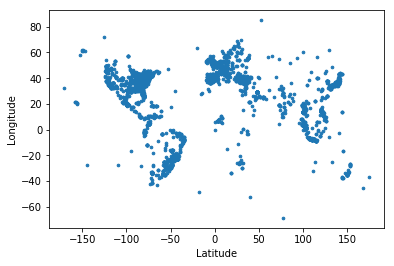

In [4]:
plt.scatter(sample_latitudes, sample_longitudes, s=7)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

## Algorithmic part

Here we develop several versions of k-centers clustering.

### Metric definition

We define a first naive algorithm for clustering, which is a (2+ϵ)-approximation for k-center, ϵ > 0.

In [ ]:
id_to_coords = {i : point for i, point in enumerate(dataset)}

In [51]:
from scipy.spatial.distance import pdist, euclidean

def build_cluster(center_id, beta, dataset_ids):
    center = id_to_coords[center_id]
    cluster_ids = [center_id] # the first id of the cluster will be the id of the center
    n = len(dataset_ids)
    i = 0
    while True:
        if i >= len(dataset_ids):
            break      
            
        point_id = dataset_ids[i]
       
        if point_id != center_id:
            distance = euclidean(center, id_to_coords[point_id])
            if distance <= 2*beta:
                cluster_ids.append(point_id)
                dataset_ids.remove(point_id)
            else:
                i += 1
        else:
            dataset_ids.remove(point_id)
    return cluster_ids, dataset_ids

In [52]:
test_cluster, test_dataset = build_cluster(0, 10, list(range(0, 100000)))
print(len(test_cluster), len(test_dataset), len(test_cluster)+len(test_dataset))
print(len(dataset))

0  %
5  %
10  %
15  %
20  %
25  %
30  %
35  %
40  %
45  %
50  %
55  %
60  %
65  %
70  %
75  %
80  %
85  %


In [70]:
def build_clustering(k, beta, dataset_ids):
    clusters = []
    for _ in range(0, k):
        if not dataset_ids:
            break
        center_id = random.sample(dataset_ids, 1)
        cluster_ids, dataset_ids = build_cluster(center_id, beta, dataset_ids)
        clusters.append(cluster_ids)
    return clusters

NameError: name 'distances' is not defined

In [59]:
import numpy as np
def max_and_min_dists():
    max_dist = 0
    min_dist = np.infty
    for i in range(0, 1000000-1):
        point = id_to_coords[i]
        for j in range(i+1, 1000000):
            neighbor = id_to_coords[j]
            distance = euclidean(point, neighbor)
            if distance > max_dist:
                max_dist = distance
            if distance < min_dist:
                min_dist = distance
    return max_dist, min_dist

In [ ]:
max_dist, min_dist = max_and_min_dists()

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
m = Basemap(projection='lcc', resolution=None)
m.bluemarble()
plt.show()